In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(r'C:\Users\Josh\Documents\Data Science\GooglePlayStoreRatings\googleplaystore.csv')

Before I even began, I cleaned the excel file to make all entries for the 'Reviews', 'Price', and 'Installs' easier to work with by formatting them such that they would be read in as ints, floats, and floats respectively.

To get an idea of the fields in this data set, I'll take the head of the csv and a description of the numerical fields.

In [2]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [3]:
data.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Let's do some data visualization:

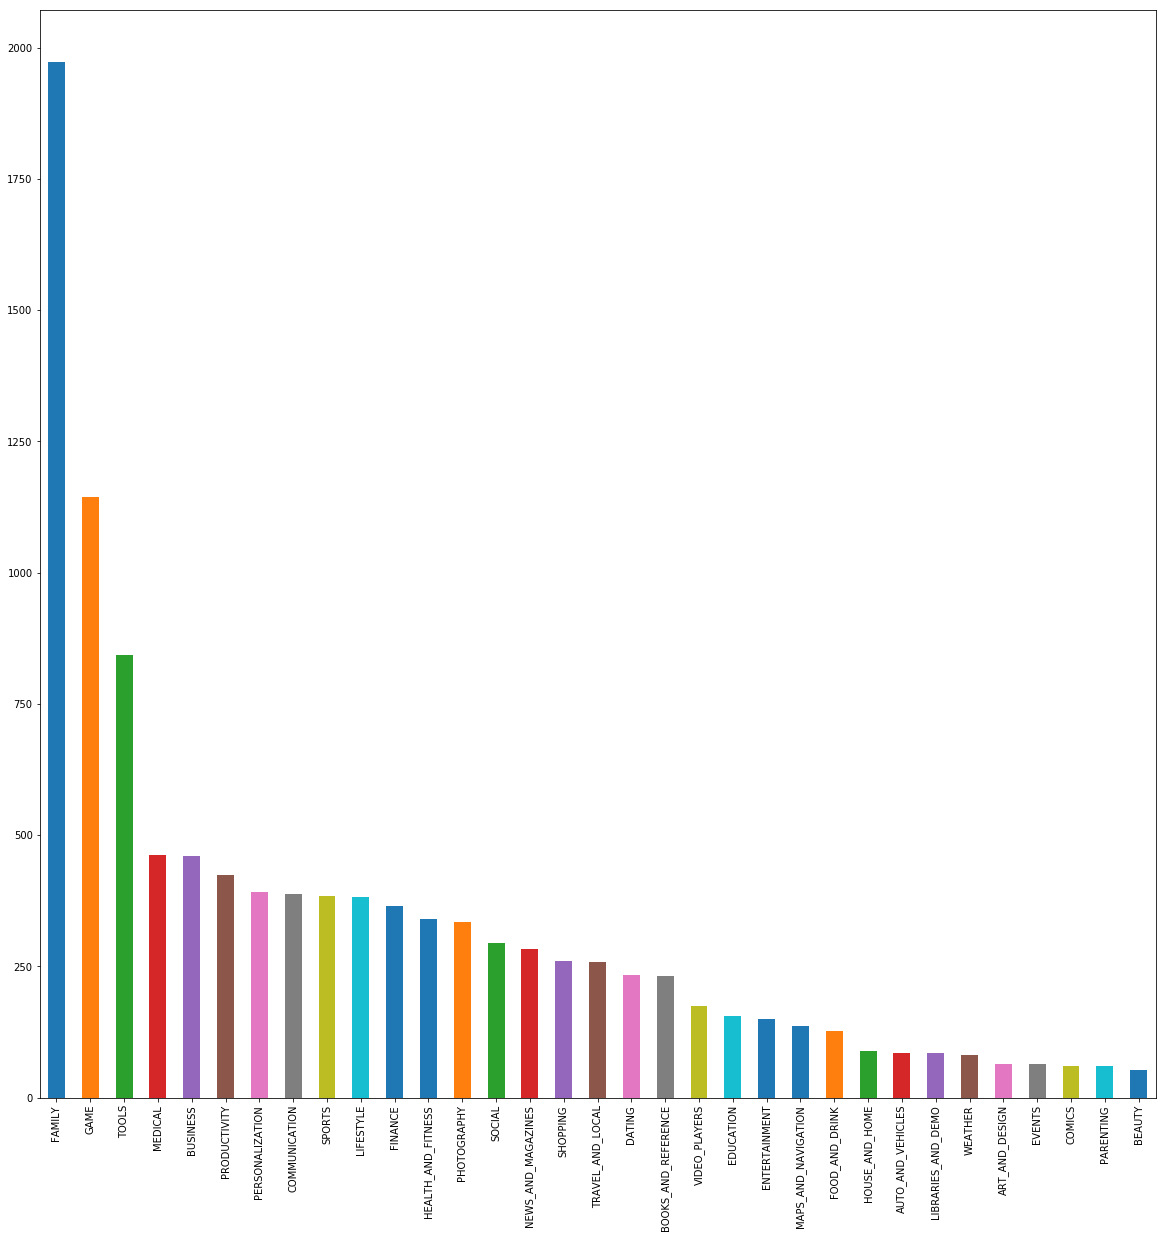

In [4]:
data['Category'].value_counts().plot(kind='bar',figsize=(20,20))

We can see that 'Family' apps have noticeably more apps than even the next two categories, 'Game' and 'Tools'.  Even then 'Game' and 'Tools' apps have noticeably more than the rest of the categories, where it then is fairly smooth compared to those first three categories.

Text(0.5,1,'Rating vs Category')

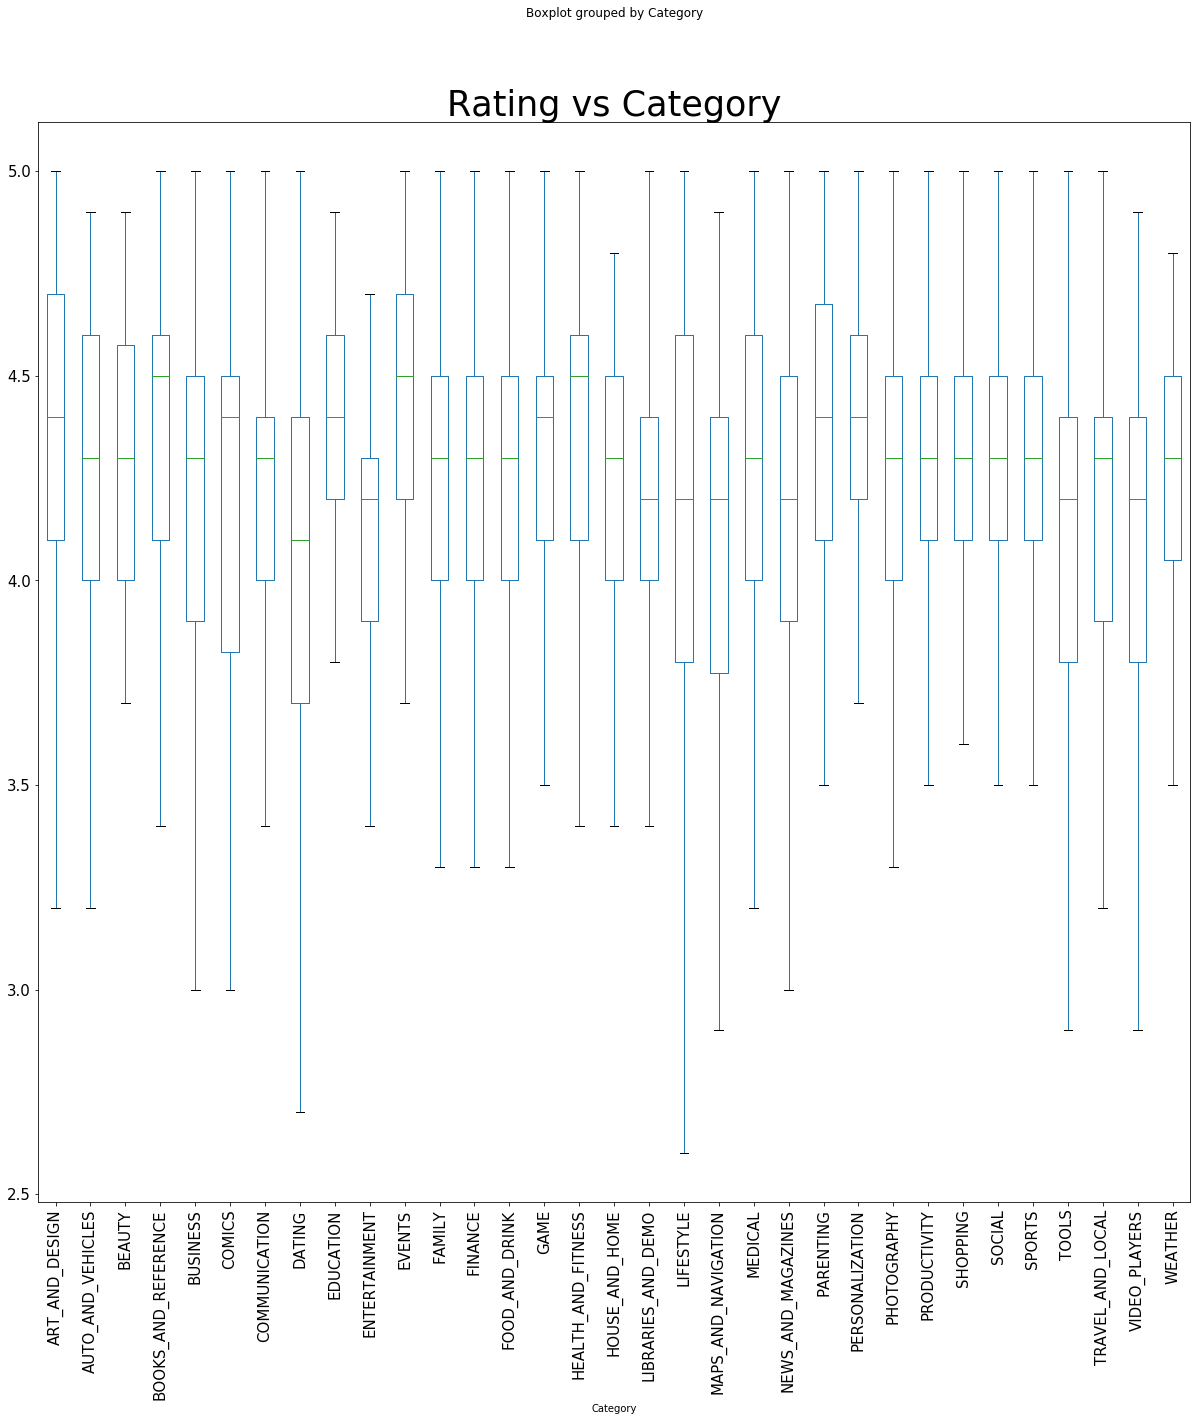

In [5]:
data.boxplot(column='Rating', by ='Category', figsize=(20,20), rot=90, fontsize=15, grid=False, sym='').set_title('Rating vs Category', fontsize=35)

There's a bit of variation in the distribution of ratings depending on the category.  Not an obscene amount, however the difference seems to be statistically significant in some cases.

In [6]:
data.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.643122,-0.009667
Installs,0.051355,0.643122,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.011689,1.000000


Review and installs both correlate with rating, however I'm suspicious that it's the high ratings that increase the amount of reviews and installs rather than the other way around.  Furthermore reviews and installs correlate with eachother quite a bit which makes sense but points to multicollinearity with these factors.

A lower price is associated with a slightly higher rating, I wonder why that could be? Dissatisfaction maybe, or a feeling of not getting one's money's worth?

Text(0.5,0,'Price')

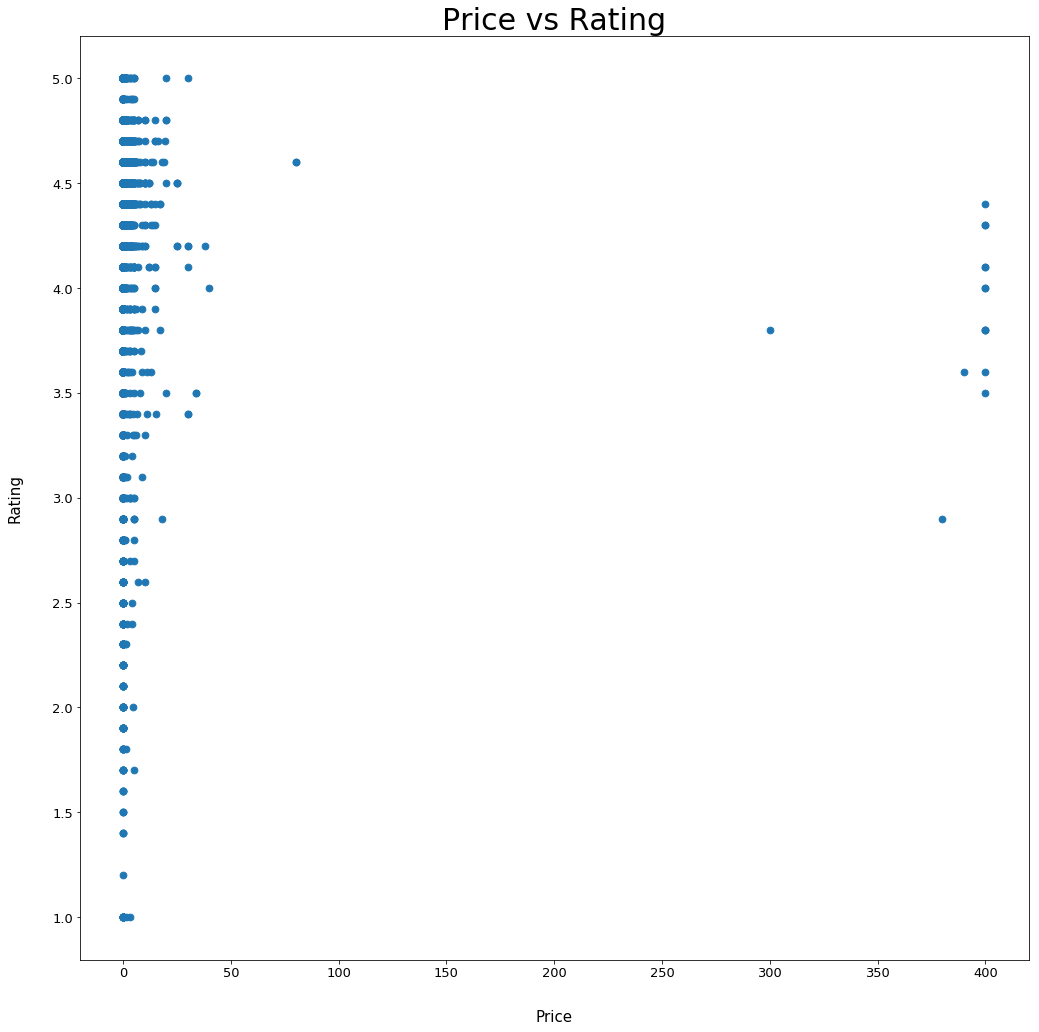

In [7]:
scatter = data.plot(x='Price', y ='Rating', kind = 'scatter', figsize=(17,17), fontsize=13, grid=False, s=45)
scatter.set_title('Price vs Rating', fontsize=30)
scatter.set_ylabel(ylabel='Rating',fontsize=15, labelpad=30)
scatter.set_xlabel(xlabel='Price', fontsize=15, labelpad=30)

I would guess from the scatterplot that the extreme price outliers are a big reason for the seeming negative correlation with rating: most of the extremely priced points here have a rating less than the average of 4.2.

In [8]:
data[(data.Price>250) & (data.Rating<4.2)].count()

App               12
Category          12
Rating            12
Reviews           12
Size              12
Installs          12
Type              12
Price             12
Content Rating    12
Genres            12
Last Updated      12
Current Ver       12
Android Ver       12
dtype: int64

In [9]:
data[(data.Price>250) & (data.Rating>=4.2)].count()

App               3
Category          3
Rating            3
Reviews           3
Size              3
Installs          3
Type              3
Price             3
Content Rating    3
Genres            3
Last Updated      3
Current Ver       3
Android Ver       3
dtype: int64

In [10]:
data = data[(data.Price<250)]
data.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068027,0.051195,0.019748
Reviews,0.068027,1.000000,0.643107,-0.016736
Installs,0.051195,0.643107,1.000000,-0.020489
Price,0.019748,-0.016736,-0.020489,1.000000


Of the extreme price outliers, 12 of them have a rating less than the mean, while only 3 have a rating greater than or equal to the mean.  By removing them, the correlation of price to rating actually increases to a positive value.

Next, I want to use the last updated field to see if how long ago the app was updated will greatly effect rating.

I'm going to convert the last updated field to datetime and subtract it from the datetime to get the difference(formatted as days here) and append this new array to the data as "TSLU" (Time Since Last Update).

In [11]:
import datetime as dt
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['TSLU'] = (dt.datetime.now()- data['Last Updated']).dt.days

In [12]:
data['TSLU'].head()

0    389
1    381
2    183
3    237
4    225
Name: TSLU, dtype: int64

In [13]:
data['TSLU'].count()

10823

In [14]:
data.corr()

,Rating,Reviews,Installs,Price,TSLU
Rating,1.000000,0.068027,0.051195,0.019748,-0.143212
Reviews,0.068027,1.000000,0.643107,-0.016736,-0.085359
Installs,0.051195,0.643107,1.000000,-0.020489,-0.101000
Price,0.019748,-0.016736,-0.020489,1.000000,0.069879
TSLU,-0.143212,-0.085359,-0.101000,0.069879,1.000000


It looks like the time since last update has a pretty sizeable effect on the rating received.  Let's make a plot to screen for extreme outliers like we had with price.

C:\Users\Josh\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'TSLU')

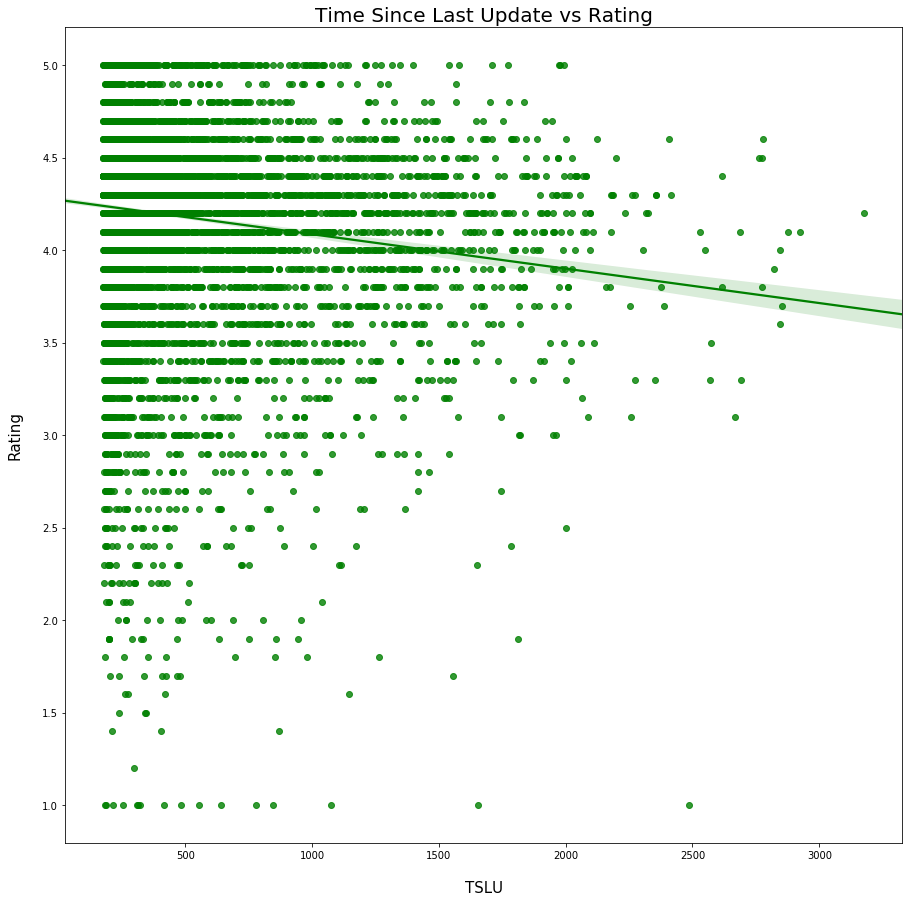

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
tsluPlot = sns.regplot(x='TSLU', y='Rating', data=data, color='g', ax=ax)
plt.title('Time Since Last Update vs Rating', fontsize=20)
tsluPlot.set_ylabel(ylabel='Rating', fontsize=15, labelpad=20)
tsluPlot.set_xlabel(xlabel='TSLU', fontsize=15, labelpad=20)

This time I fitted a regression line as I suspected the outliers weren't a major problem; the plot confirms my beliefs on this. 

The next thing I'm going to do is see if the amount of genres an app has correlates with ratings.  The 'Category' given to an app doesnt correlate very heavily, so I won't bother spending the time to parse through the genre strings and try and relate the multiple genres an app may belong too.  Instead, I will just count the amount of genres each app has.  The spreadsheet conveniently has the genres seperated by a semicolon so this will be fairly trivial.

In [16]:
data['genreCount'] = (data['Genres'].str.split(";")).str.len()
data.genreCount.head()

0    1
1    2
2    1
3    1
4    2
Name: genreCount, dtype: int64

In [17]:
data.corr()

,Rating,Reviews,Installs,Price,TSLU,genreCount
Rating,1.000000,0.068027,0.051195,0.019748,-0.143212,0.048231
Reviews,0.068027,1.000000,0.643107,-0.016736,-0.085359,-0.006730
Installs,0.051195,0.643107,1.000000,-0.020489,-0.101000,-0.017631
Price,0.019748,-0.016736,-0.020489,1.000000,0.069879,0.007368
TSLU,-0.143212,-0.085359,-0.101000,0.069879,1.000000,-0.015170
genreCount,0.048231,-0.006730,-0.017631,0.007368,-0.015170,1.000000


So it looks like there is some effect on rating based on the amount of genres noted in the app; let's make another plot!

Text(0.5,0,'Genres')

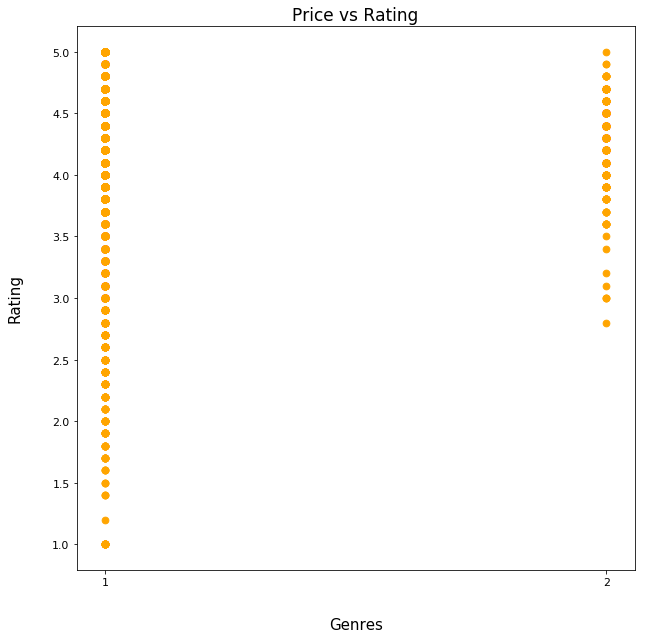

In [18]:
scatter2 = data.plot(x='genreCount', y ='Rating', kind = 'scatter', fontsize=11, figsize=(10,10), grid=False, s=45, color='orange',xticks=(1,2))
scatter2.set_title('Price vs Rating', fontsize=17)
scatter2.set_ylabel(ylabel='Rating',fontsize=15, labelpad=30)
scatter2.set_xlabel(xlabel='Genres', fontsize=15, labelpad=30)

Turns out, the amount of genres is only ever one or two.  Still, it's clear that those apps with 2 genres are an average higher rated than those with one.

Next to look at a boxplot of content rating vs rating to get an idea of how the intended age audience can affect rating.

Text(0.5,1,'Rating vs Content Rating')

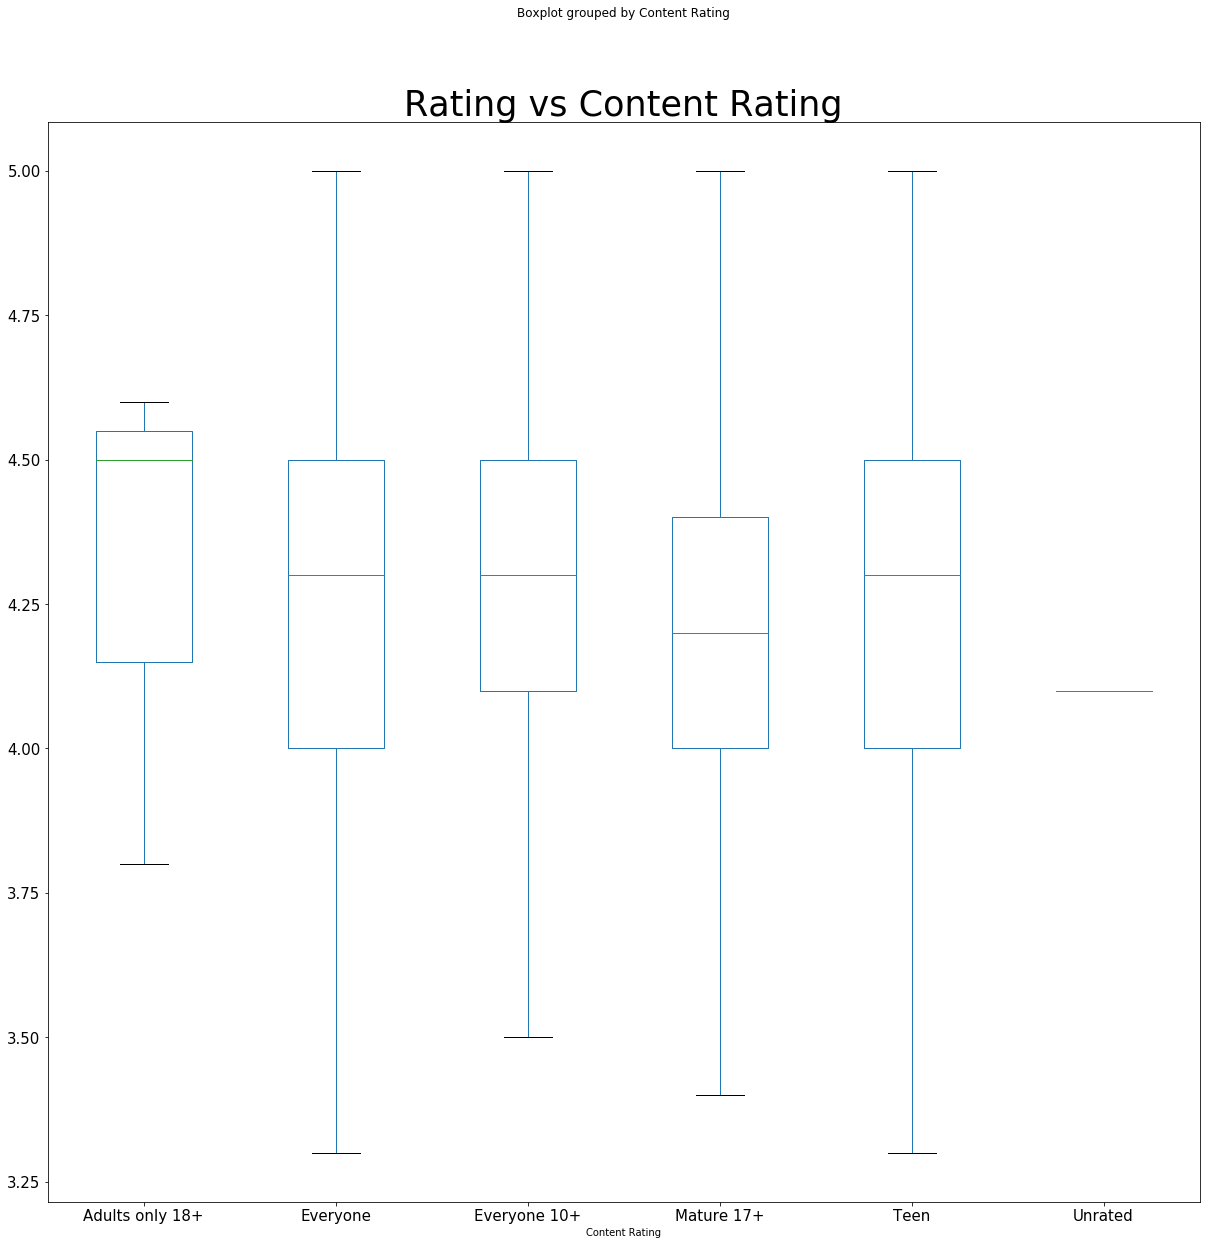

In [19]:
data.boxplot(column='Rating', by ='Content Rating', figsize=(20,20), fontsize=15, grid=False, sym='',).set_title('Rating vs Content Rating', fontsize=35)

It looks like there is somewhat of a difference in rating based on the content rating received.  I infer that this will be useful when creating a predictive model.

Now for the juicy part;  I'm going to use a random forest regressor to attempt to create a model that will (hopefully) be able to somewhat accurately assess the approximate rating of an app on the app store.

In [20]:
data.isnull().sum()

App                  0
Category             0
Rating            1472
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
TSLU                 0
genreCount           0
dtype: int64

There's a lot of null ratings; I'm going to drop all of these values because rating is what I'm trying to predict and so there's no longer useful information in this field.  Furthermore, there is only 8 entries without current version and 2 entries without the android version, so I'll just opt to drop all NA fields.

While I'm at it, I'll drop any duplicate fields to reduce unnecessary redundancy.

In [21]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
TSLU              0
genreCount        0
dtype: int64

The data is looking pretty lean now, let's get to making some models.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [23]:
features = ['TSLU','Category','Reviews','Installs','Price','Content Rating','genreCount']
encodedData = data[features]
encodedData = pd.get_dummies(data[features])

x = encodedData
y = data['Rating']

train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=1)
model = RandomForestRegressor(random_state=1)
model.fit(train_x,train_y)
val_predictions = model.predict(val_x)

print ("Score: %f" % model.score(val_x,val_y))

C:\Users\Josh\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.081658


So, trying to create a regression model doesn't work very well as evidence by the .082 score given here....

I'm guessing that having this many categorical variables makes regression not very helpful.  Most factors for apps are qualititative and therefore it's hard for an algorithm to try and predict a continuous response with a specific combination of factors.  

What if instead we used a classifier tree to simply place the apps into categories corresponding to being at or above the mean, or being below the mean?

In [24]:
encodedData2 = data[features]
encodedData2 = pd.get_dummies(data[features])

ratingCat = dict()
for i in range(0,len(data['Rating'])):
    if data['Rating'].iloc[i] >= 4.19:
        ratingCat[i] = 'Above'
    else: ratingCat[i] = 'Below'
data = data.assign(ratingCat = pd.Series(ratingCat).values)
le = LabelEncoder()
data['ratingCat'] = le.fit_transform(data['ratingCat'])
        
x = encodedData2
y = data['ratingCat']

train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(train_x,train_y)
val_predictions = model.predict(val_x)

print ("Score: %f" % model.score(val_x,val_y))

C:\Users\Josh\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.686655


Look at that!  Using a random forest classifier instead we get a much higher score for being able to predict if an app will be above or below the mean.

Well, apps actually range from 1-5 in rating, what if we defined our categories to be above/below 2.5(the halfway point of rating values)?

In [25]:
encodedData3 = data[features]
encodedData3 = pd.get_dummies(data[features])

ratingCat = dict()
for i in range(0,len(data['Rating'])):
    if data['Rating'].iloc[i] >= 2.5:
        ratingCat[i] = 'Above'
    else: ratingCat[i] = 'Below'
data = data.assign(ratingCat = pd.Series(ratingCat).values)
le = LabelEncoder()
data['ratingCat'] = le.fit_transform(data['ratingCat'])
        
x = encodedData3
y = data['ratingCat']

train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(train_x,train_y)
val_predictions = model.predict(val_x)

print ("Score: %f" % model.score(val_x,val_y))

C:\Users\Josh\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.988278


Wow, the score is incredibly high for determing if an app will be above or below 2.5.  I want to take it a step further and see if we can predict if an app will fall into 4 categories of rating; 1-2,2-3,3-4,4-5.

In [26]:
encodedData4 = data[features]
encodedData4 = pd.get_dummies(data[features])

ratingCat = dict()
for i in range(0,len(data['Rating'])):
    if data['Rating'].iloc[i] >= 1 and data['Rating'].iloc[i] <2:
        ratingCat[i] = 'Cat 1'
    elif  data['Rating'].iloc[i] >= 2 and data['Rating'].iloc[i] <3:
        ratingCat[i] = 'Cat 2'
    elif  data['Rating'].iloc[i] >= 3 and data['Rating'].iloc[i] <4:
        ratingCat[i] = 'Cat 3'
    elif  data['Rating'].iloc[i] >= 4 and data['Rating'].iloc[i] <=5:
        ratingCat[i] = 'Cat 4'
        
data = data.assign(ratingCat = pd.Series(ratingCat).values)
le = LabelEncoder()
data['ratingCat'] = le.fit_transform(data['ratingCat'])
        
x = encodedData4
y = data['ratingCat']

train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(train_x,train_y)
val_predictions = model.predict(val_x)

print ("Score: %f" % model.score(val_x,val_y))

C:\Users\Josh\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.755185


Surprisingly, the model had even more success with classifying things into 4 categories than if it just did above or below the mean.  I'm surprised with the score of this model, but there's obviously a lot to learn here.

# Conclusions

While the predictive models I created were able to overall pretty accurately predict specific classifications of ratings, I realize that many of the correlations are just that-correlations.  Meaning the causal factors that lead to an app getting a higher rating are likely much more nuanced than just the correlations I've been able to draw here.  For example, there's a .068 correlation between rating and reviews.  Does this mean the amount of reviews generally leads to higher ratings?  Probably not.  The likely explanation is that the higher rating something has the more exposure it gets and therefore leads to a higher number of reviews.  Additionally there's a low correlation between installs and ratings and a very high correlation between installs and reviews.  This means that install and reviews basically give the same information.  A quick google search reveals from Google that you can't review an app without having installed it and therefore every review is also an install (though not the other way around).  

Price tends to lead to slightly higher rating, which makes sense.  Minus the ridiculous novelty outliers, most payed apps are payed because they are (on average) higher quality.  This doesn't mean they can't get worse reviews, but in general if someone is willing to pay for an app they probably have reason to believe that app is decent enough, and if the given app has any amount of non trivial installs already it likely has a higher likelihood to be higher rated (atleast a little bit).  Of course the effect isn't very much but I think it does make sense to have a slghtly positive correlation with price. 

The app's category and content rating also has a slight categorical effect on the rating of the app.  I find it hard to make an assumption about the reasonings behind this.  Are certain target audiences more/less critical?  Are certain sub-types of apps nested in certain categories bringing down that category's average rating?  The differences aren't massive but they are noticeable enough in certain cases that it makes me curious.

Time since last update had a pretty noticeable effect on the average rating and this is very intuitive.  Even if you've perfected the functionality of an app, over time bugs will arise as operating systems update, new features will become standard and expected, etc..  If you're not keeping up with your app's market it will soon become depricated.

Lastly apps with two genres generally had a higher rating than those with only one.  I infer that having more genres means that an app has a wider breadth of appeal and generally more work put into it.

# Things to think about for the future:

How can I have converted the size of the app in the format of "#M" or "#k" into a usable amount to try and run predictions?

Moving the plots into regular mat plot formats instead of using the methods built into pandas.
    
How can I adjust the parameters of the machine learning algorithms to create a better model?  I haven't experimented very much with them but there's much that can be done to ensure the most efficient models.

I'm worried that the model to classify as above or below 2.5 rating may have been overfit based on how high the R^2 score was.

Overall this was a big project and I learned an amazing amount of things regarding data visualization and exploratory data analysis, data cleaning, and deployment of machine learning algorithms for prediction.